# Project Main Workbook

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from category_encoders import TargetEncoder
from category_encoders import BinaryEncoder

## 1) Initial Data Exploration

In [16]:
df = pd.read_csv('/Users/mansi/Desktop/Fall _2023/Applied Machine Learning/AML_Project/Data/Credit_card.csv')
df_label = pd.read_csv('/Users/mansi/Desktop/Fall _2023/Applied Machine Learning/AML_Project/Data/Credit_card_label.csv')

In [17]:
df.head(5)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [18]:
credit_df = df.merge(df_label, on = 'Ind_ID')

In [19]:
len(credit_df)

1548

In [20]:
credit_df

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

In [21]:
# education_df = pd.DataFrame(credit_df.groupby(['EDUCATION']).count()).reset_index()

<b> 2 Plot charts to understand data distribution of the target variable. </b>

Application Approved:  1373  Probability:  0.887
Application Rejected:  175 Probability:  0.113


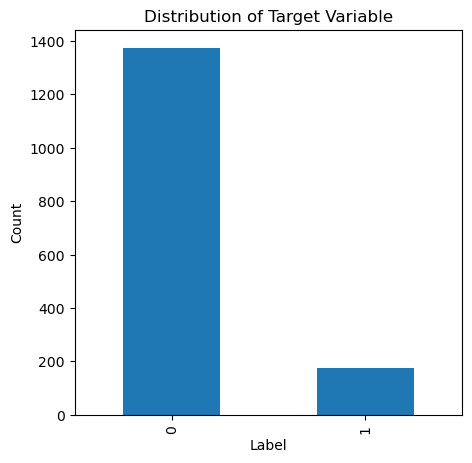

In [24]:
#TARGET VARIABLE DISTRIBUTION

label, count = np.unique(credit_df['label'], return_counts = True)
probability = count/len(credit_df)

print("Application Approved: ", count[0], " Probability: ", probability[0].round(3))
print("Application Rejected: ", count[1], "Probability: ", probability[1].round(3))

plt.figure(figsize = (5, 5))
credit_df['label'].value_counts().plot(kind = 'bar')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
#plt.xticks(rotation = '0')
plt.show()

# 0 -> Approved
# 1 -> Rejected

<b> 3 Plot correlation / stacked bar charts to understand the relationship between each variable and the target variable </b>

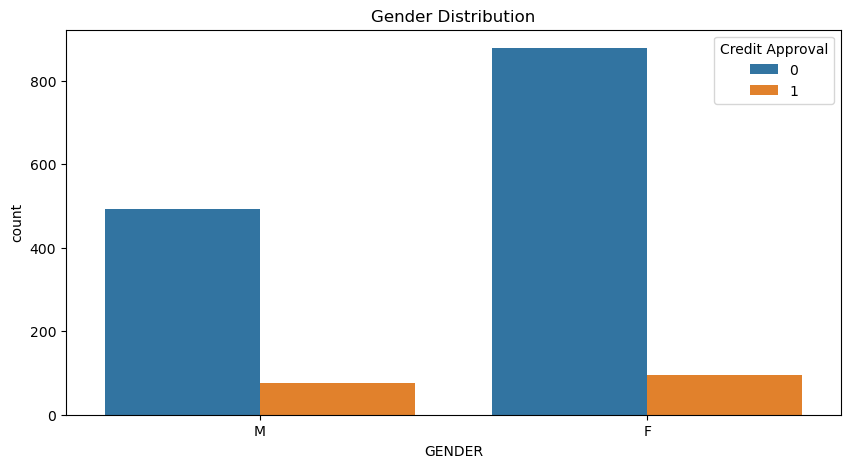

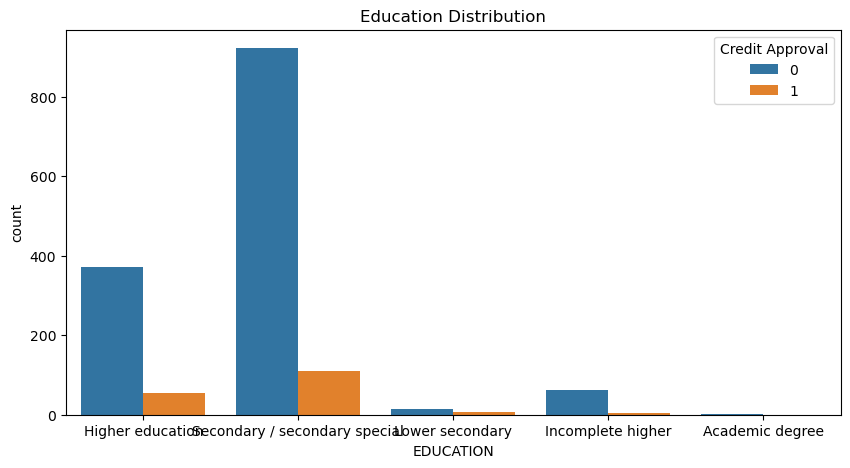

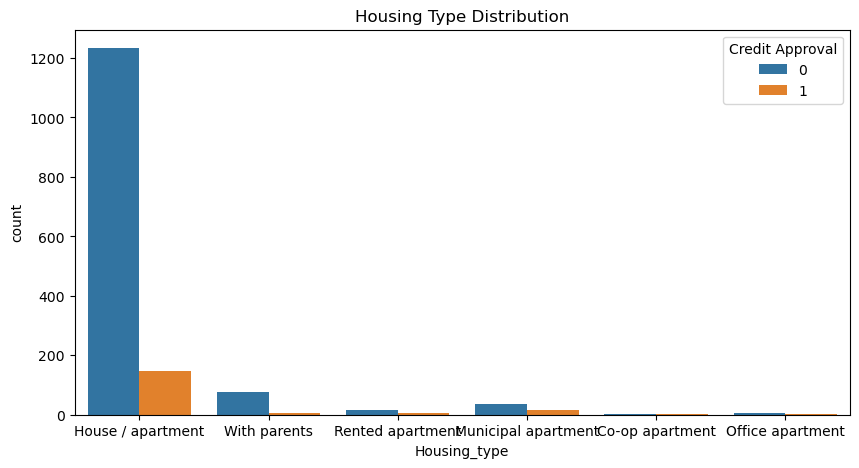

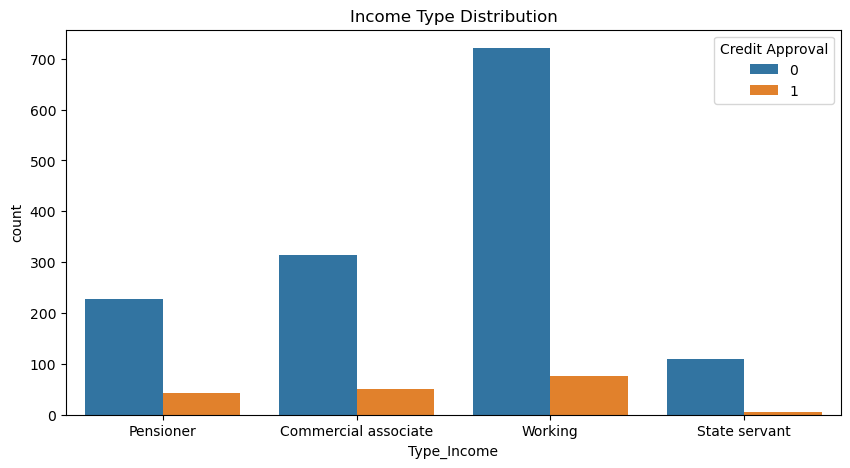

In [26]:
#Distribution of Categorical Variables wrt Target Variable

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'GENDER', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Gender Distribution")
#plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'EDUCATION', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Education Distribution")
#plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Housing_type', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Housing Type Distribution")
#plt.xticks(rotation = '45')
plt.show()

fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Type_Income', hue = 'label', ax = axes)
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Income Type Distribution")
#plt.xticks(rotation = '45')
plt.show()


<b> 1 Plot charts to understand data distribution of the numerical / categorical variables. </b>

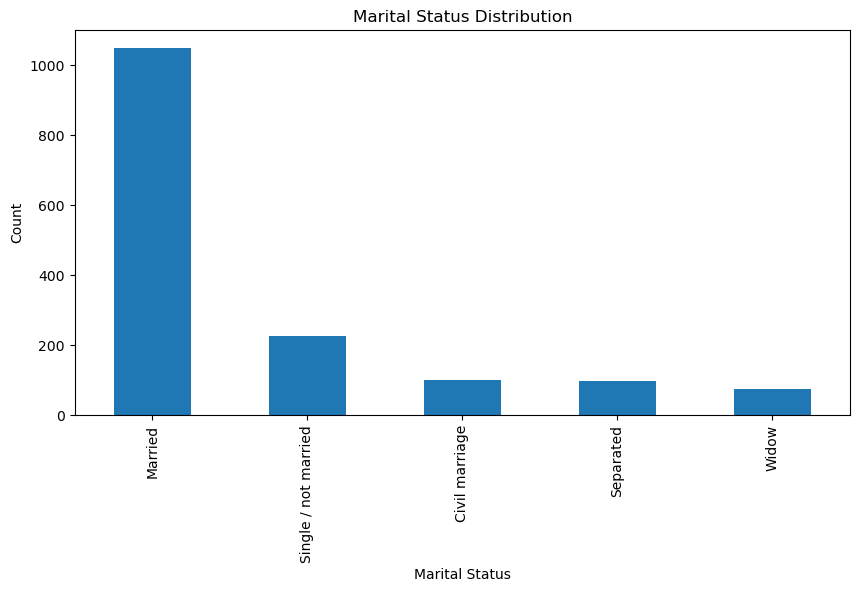

In [27]:
#Marital Status Distribution 

plt.figure(figsize = (10, 5))
credit_df['Marital_status'].value_counts().plot(kind = 'bar')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Distribution")
#plt.xticks(rotation = '45')
plt.show()

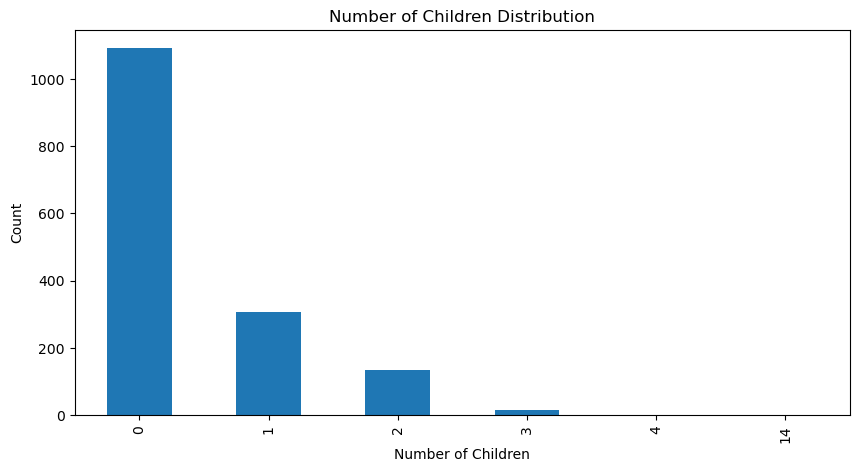

In [28]:
#Number of Children Distribution

plt.figure(figsize = (10, 5))
credit_df['CHILDREN'].value_counts().plot(kind = 'bar')
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Number of Children Distribution")
#plt.xticks(rotation = '0')
plt.show()

#14 seems to be an outlier

<b> 4 Plot correlation between each of the input variables </b>

In [29]:
credit_df['Employment_Status'] = np.where(credit_df['Employed_days'] > 0 , 'Unemployed', 'Employed')
credit_df.head(5)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label Employment_Status  
0             NaN               2      1        Unemployed  
1             NaN               2      1          Employed  
2             NaN               2      1          Employed  
3             NaN               2      1          Employed  
4             NaN               2      1          Employed

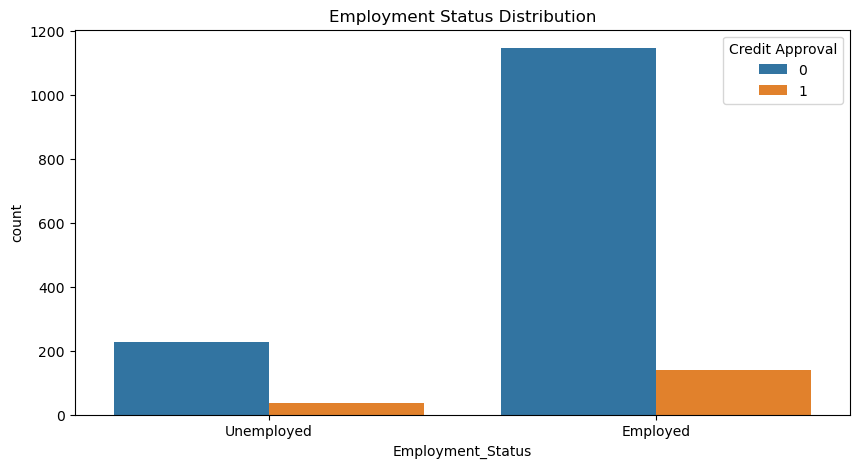

In [31]:
#Employment Status wrt Target Variable

plt.figure(figsize = (10, 5))
sns.countplot(data = credit_df, x = 'Employment_Status', hue = 'label')
plt.legend(loc = 'upper right', title = 'Credit Approval')
plt.title("Employment Status Distribution")
#plt.xticks(rotation = '45')
plt.show()

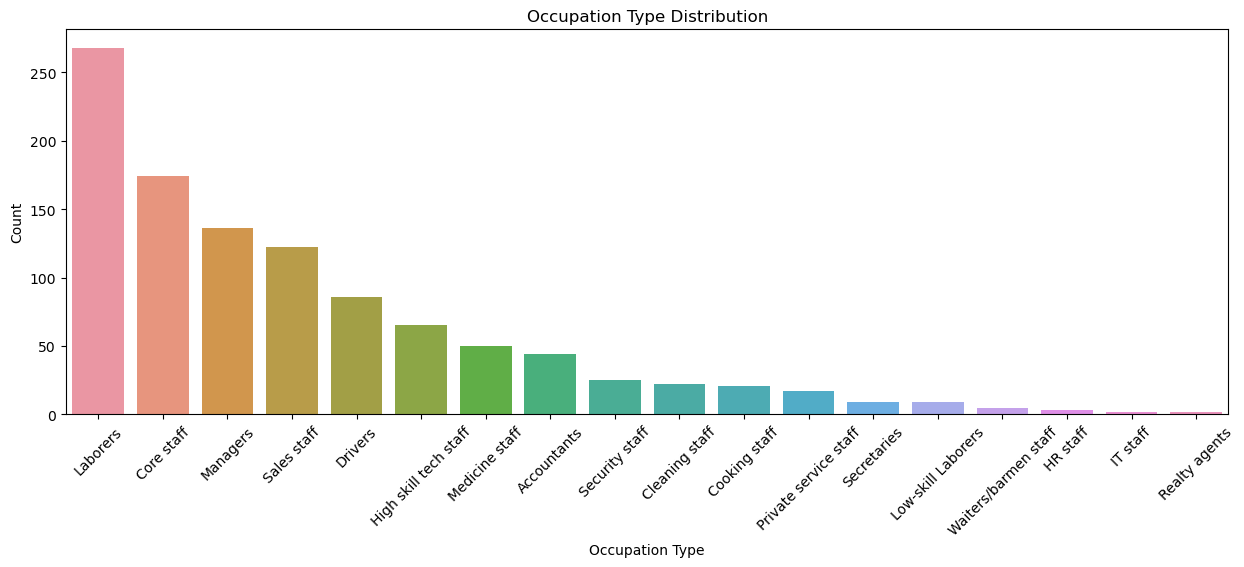

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [32]:
#Occupation Type Distribution


plt.figure(figsize = (15, 5))
sns.barplot(x = df['Type_Occupation'].value_counts().index, y = df['Type_Occupation'].value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation = 45)
plt.show()

df['Type_Occupation'].value_counts()

<b> 5 Other Ideas <b>

In [117]:
#Can plot age distribution

# 2) Cleaning and Sampling

<b> 1 Perform missing value analysis, describe how potentially to encode missing values </b>

In [34]:
missing_values = credit_df.isnull().sum()
cols_with_missing_values = missing_values[missing_values > 0].index.tolist()

print(f"Columns with missing values: {cols_with_missing_values}")

Columns with missing values: ['GENDER', 'Annual_income', 'Birthday_count', 'Type_Occupation']


In [35]:
missing_values_count = credit_df.isnull().sum()

print(missing_values_count)

Ind_ID                 0
GENDER                 7
Car_Owner              0
Propert_Owner          0
CHILDREN               0
Annual_income         23
Type_Income            0
EDUCATION              0
Marital_status         0
Housing_type           0
Birthday_count        22
Employed_days          0
Mobile_phone           0
Work_Phone             0
Phone                  0
EMAIL_ID               0
Type_Occupation      488
Family_Members         0
label                  0
Employment_Status      0
dtype: int64


In [36]:
credit_df['GENDER'].fillna('U', inplace=True)

In [45]:
credit_df['Annual_income'].fillna(credit_df['Annual_income'].median(), inplace=True)

In [46]:
credit_df['Birthday_count'].fillna(credit_df['Birthday_count'].median(), inplace=True)

In [50]:
credit_df['Type_Occupation'].fillna('Unknown', inplace=True)

The columns with missing values can be encoded in the following ways:

1. Gender - Since there are only 7 missing values, a new category can be assigned to it 'U', indicating the gender is Unknown. 

2. Annual Income - Median can be used to fill missing values since it is less affected by outliers and extreme values that might be present. 

3. Birthday Count - Median imputation can be used because it is robust against the influence of outliers and skewed data. 

4. Type of Occupation - The most neutral way to avoid bias in the dataset is to create a new category called "Unknown," as the variable is categorical and the modes of the categories are not highly dominant.

<b> 2 Describe how to encode each of the categorical features ie) OHE, target encoding, ordinal encoding </b>

In [51]:
categorical_columns = credit_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation',
       'Employment_Status'],
      dtype='object')


In [52]:
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
                       'Marital_status', 'Housing_type', 'Type_Occupation', 'Employment_Status']

categories_dict = {}

for col in categorical_columns:
    categories_dict[col] = credit_df[col].unique()

for col, categories in categories_dict.items():
    print(f"The unique categories in {col} are: {categories}")

The unique categories in GENDER are: ['M' 'F' 'U']
The unique categories in Car_Owner are: ['Y' 'N']
The unique categories in Propert_Owner are: ['Y' 'N']
The unique categories in Type_Income are: ['Pensioner' 'Commercial associate' 'Working' 'State servant']
The unique categories in EDUCATION are: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
The unique categories in Marital_status are: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
The unique categories in Housing_type are: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
The unique categories in Type_Occupation are: ['Unknown' 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff'
 'Accountants' 'High skill tech staff' 'Managers' 'Cleaning staff'
 'Drivers' 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff'
 'Security staff' 'Medicine staff' 'Private service staff' 'HR staff'


In [59]:
#Ordinal Encoding for binary categorical variables 
credit_df['GENDER'] = credit_df['GENDER'].map({'U': 2, 'M': 1, 'F': 0})
credit_df['Car_Owner'] = credit_df['Car_Owner'].map({'Y': 1, 'N': 0})
credit_df['Propert_Owner'] = credit_df['Propert_Owner'].map({'Y': 1, 'N': 0})
credit_df['Employment_Status'] = credit_df['Employment_Status'].map({'Employed': 1, 'Unemployed': 0})


#Binary Encoding 
bin_encoder = BinaryEncoder(cols=['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type'])
credit_df = bin_encoder.fit_transform(credit_df)

In [60]:
#Target Encoding 
target_enc = TargetEncoder(cols=['Type_Occupation'])
credit_df['Type_Occupation_encoded'] = target_enc.fit_transform(credit_df['Type_Occupation'], credit_df['label'])

* For categorical variables with only 2-3 categories such as Gender, Car Owner, Property Owner, and Employment Status, ordinal encoding is used. 

* For categorical variables with 4-5 categories such as Type of Income, Marital Status, Housing Type and Education, binary encoding is used because it doesn’t impose an ordinal relationship and it reduces the dimensionality compared to one-hot encoding.

* For Type of Occupation, target encoding can be used since it has high cardinality and can capture more information about the target variable within the feature which could be helpful for the predictive model. 


Note: 
Can do Ordinal Encoding for all the categorical features, if we plan to use tree based models. 
Target encoding can lead to overfitting, regularization methods like smoothing should be done. 

<b> 3 Describe the sampling method for the train/dev split, cross-validation etc. </b>

In [66]:
X = credit_df.drop(columns=['label', 'Type_Occupation'])
y = credit_df['label']

In [69]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

The number of approved applications significantly outnumber the rejected ones, to maintain the distribution of the label across train, test and validation sets, stratified sampling is used. It ensures that each set has the same percentage of samples of each target class as the complete set. 



# 3) Insights from Data Exploration


<b> 1 Describe which features if any need to be dropped, scaled, etc. </b>

<b> 2 Describe overall findings from (1)-(2) </b>

<b> 3 Other Ideas </b>

# 4) Machine Learning Techniques Proposed to be Implemented

<b> 1 Describe the goal, and machine learning techniques that could be implemented </b>

<b> 2 Describe the performance metrics we will be evaluating </b>

<b> 3 Describe the means for doing the hyperparameter tuning, training, etc. ie) calibration, over/undersampling etc. </b>

<b> 4 Other Ideas </b>